<a href="https://colab.research.google.com/github/TerryTian21/PyTorch-Practice/blob/main/Tutorials/NLP/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latent Dirchlet Allocation

The following section follows the model implementation from [Python Tutorials YT Channel](https://www.youtube.com/watch?v=TKjjlp5_r7o&ab_channel=PythonTutorialsforDigitalHumanities)

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import json
import glob

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Spacy
import spacy
from nltk.corpus import stopwords

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
! pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [ ]:
!pip install pyldavis

In [ ]:
# For visualization

import pyLDAvis
import pyLDAvis.gensim


## Loading Data

In [ ]:
def load_data(file):
  with open(file, "r", encoding="utf-8") as f:
    data = json.load(f)
  return data

def write_data(file, data):
  with open(file, "w", encoding='Utf-8') as f:
    json.dump(data, f, indent=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stopwords = stopwords.words("english")
stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
data = load_data("ushmm_dn.json")
data.keys()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys(['RG', 'texts'])

In [ ]:
len(data["texts"])

252

In [ ]:
data = data["texts"]
data[0][:90]

' My name David Kochalski. I was born in a small town called , and I was born May 5, 1928. '

This performs lemmatization on a body of texts first iterating through each text file and checking if each word belongs to the follow POS (position of speech) categories
- Noun
- Adjective
- Verb
- Adverb

If so, it lemmatizes (breaks the word down into its root form) the word

In [ ]:
def lemmatization(texts, allowed_postages=["NOUN", "AD3", "VERB", "ADV"]):
  nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
  texts_out = []

  for text in texts:
    doc = nlp(text)
    new_text = [ token.lemma_ for token in doc if token.pos_ in allowed_postages]
    final = " ".join(new_text)
    texts_out.append(final)

  return texts_out

In [ ]:
lemmatize_texts = lemmatization(data)
print(lemmatize_texts[0][:90])

name bear town call bear very hard work child father mother mill flour go school school mo


Removing stopwords from the lemmatized text

In [ ]:
def gen_words(texts):
  final = []
  for text in texts:
    new = gensim.utils.simple_preprocess(text, deacc=True)
    final.append(new)
  return final

data_words = gen_words(lemmatize_texts)
print(data_words[0][:90])

['name', 'bear', 'town', 'call', 'bear', 'very', 'hard', 'work', 'child', 'father', 'mother', 'mill', 'flour', 'go', 'school', 'school', 'morning', 'afternoon', 'go', 'school', 'almost', 'night', 'raise', 'spirit', 'school', 'city', 'segregate', 'mind', 'town', 'say', 'majority', 'people', 'town', 'people', 'town', 'somehow', 'know', 'separate', 'child', 'child', 'know', 'people', 'use', 'friend', 'feel', 'maybe', 'personally', 'know', 'lot', 'incident', 'call', 'separate', 'word', 'hardly', 'get', 'together', 'incident', 'incident', 'incident', 'call', 'house', 'people', 'regardless', 'believe', 'really', 'people', 'family', 'city', 'even', 'though', 'time', 'go', 'underground', 'institution', 'parent', 'say', 'very', 'go', 'even', 'very', 'youngster', 'father', 'use', 'subscribe', 'newspaper', 'origin', 'paper', 'paper', 'however', 'father']


Maps an index to unique words in the text corpus. For example the word "name" could be given an "id" of 0 in the `id2word` dictionary.

Then for each document in the corpus, a dictionary is created mapping the number of occurances for each word (bow - bag of words) to the index of the word.

In [ ]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 11), (1, 1), (2, 2), (3, 1), (4, 2), (5, 1), (6, 2), (7, 3), (8, 1), (9, 1), (10, 8), (11, 1), (12, 2), (13, 1), (14, 3), (15, 2), (16, 1), (17, 2), (18, 11), (19, 1)]
about


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=30,
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")

## Visualize Data

This [stack overflow](https://stackoverflow.com/questions/76117613/brokenprocesspool-a-task-has-failed-to-un-serialize-error-when-running-pylda) post discusses how the pyLDAvis uses a different pandas version.

In [ ]:
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
20     0.093338  0.340199       1        1  26.798243
5      0.102203  0.285921       2        1  17.055063
19     0.071399  0.429004       3        1  13.133155
18    -0.021439  0.357579       4        1  12.380273
25     0.242421  0.352373       5        1  10.168768
1      0.190740  0.351742       6        1   8.566813
11     0.142349  0.405167       7        1   7.881862
24    -0.223737  0.328389       8        1   2.740994
3     -0.152695  0.347828       9        1   1.192912
0      0.137103 -0.137359      10        1   0.069457
15    -0.020049 -0.159834      11        1   0.004478
17    -0.038193 -0.153525      12        1   0.001986
6     -0.029073 -0.152602      13        1   0.000370
29    -0.029077 -0.152624      14        1   0.000354
8     -0.029077 -0.152621      15        1   0.000353
9     -0.029079 -0.152633      16        1   0.000346
16    -0.029079 -0.152634      17        1   0.000344
14    -0.029079 -0.152634      18        1   0.000343
22    -0.029080 -0.152637      19        1   0.000340
23    -0.029080 -0.152638      20        1   0.000339
21    -0.029080 -0.152639      21        1   0.000338
10    -0.029081 -0.152642      22        1   0.000332
12    -0.029081 -0.152642      23        1   0.000330
28    -0.029081 -0.152645      24        1   0.000319
27    -0.029082 -0.152647      25        1   0.000316
13    -0.029082 -0.152647      26        1   0.000316
26    -0.029082 -0.152647      27        1   0.000315
7     -0.029082 -0.152651      28        1   0.000314
2     -0.029082 -0.152649      29        1   0.000314
4     -0.029083 -0.152652      30        1   0.000312, topic_info=       Term          Freq         Total Category  logprob  loglift
129   child   3140.000000   3140.000000  Default  30.0000  30.0000
588     say  14362.000000  14362.000000  Default  29.0000  29.0000
334    home   2498.000000   2498.000000  Default  28.0000  28.0000
373    know  21110.000000  21110.000000  Default  27.0000  27.0000
294      go  24370.000000  24370.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
292    give      0.000201   4754.600691  Topic30  -9.4457  -4.3010
762    year      0.000201   3458.868199  Topic30  -9.4458  -3.9828
258  father      0.000201   3992.881189  Topic30  -9.4458  -4.1264
406     man      0.000201   3516.172744  Topic30  -9.4458  -3.9993
536     put      0.000201   3427.749189  Topic30  -9.4458  -3.9738

[2895 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.153844  about
0         2  0.225522  about
0         3  0.161420  about
0         4  0.089743  about
0         5  0.230184  about
...     ...       ...    ...
2853      1  0.025026   zone
2853      2  0.825847   zone
2853      4  0.033368   zone
2853      8  0.116786   zone
7038     10  0.772308   zoom

[2455 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 6, 20, 19, 26, 2, 12, 25, 4, 1, 16, 18, 7, 30, 9, 10, 17, 15, 23, 24, 22, 11, 13, 29, 28, 14, 27, 8, 3, 5])

We see a high concentration of clusters which doesn't match the number of topics we initially specificied. Furthermore, the top words assoicated with each cluster don't harmonize the topics well. Many of these words are too generic and we arn't able to interpret the clusters.

- How can we change our pre-processing and remove words with "little" meaning so that the topics harmonize better

## Word Removal

We will attempt to get better clusting by performing the followign data-preprocessign steps
- Add in bigrams and trigrams
- Remove common "meaningless" words using TF-IDF

### Bigrams and Trigrams

In [ ]:
# Min number of times two words need to appear next to each other to be considered as
# Threshold determines the number of phrases found (higher means fewer phrases)
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=50)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
  return [bigram[doc] for doc in texts]

def make_trigrams(texts):
  return [trigram[bigram[doc]] for doc in texts]

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

In [ ]:
print( [word for word in data_bigrams_trigrams[0] if "_" in word] )

['kind_of', 'concentration_camp', 'of_sudden', 'kind_of', 'kind_of', 'dig_ditch', 'no_matter', 'drink_water', 'later_on', 'as_soon', 'of_sudden', 'uncle_aunt', 'later_on', 'of_sudden', 'once_while', 'once_while', 'more_less', 'singe_song', 'cabinet_maker', 'kind_of', 'kind_of', 'machine_gun', 'kind_of', 'of_sudden', 'open_door', 'kind_of', 'dig_ditch', 'year_ago', 'of_course', 'bucket_water', 'bucket_water', 'of_sudden', 'kind_of', 'as_far', 'piece_bread', 'engage_activity', 'uprising_uprising', 'pay_attention', 'piece_bread']


### TF-IDF

In [ ]:
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[0][0:20])

[(0, 11), (1, 1), (2, 2), (3, 1), (4, 2), (5, 2), (6, 3), (7, 1), (8, 1), (9, 8), (10, 1), (11, 1), (12, 1), (13, 3), (14, 2), (15, 1), (16, 2), (17, 11), (18, 1), (19, 7)]


In [ ]:
tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

# Removing words that meet a specific threshold

for i in range(0, len(corpus)):
  bow = corpus[i]
  low_value_words = []

  # Gets id of words after tfidf
  tfidf_ids = [id for id, value in tfidf[bow]]
  # IDs of words in a single corpa
  bow_ids = [id for id, value in bow]

  # Removed words
  low_value_words = [id for id, value in tfidf[bow] if value < low_value]

  # Ids of dropped words
  drops = low_value_words + words_missing_in_tfidf

  for item in drops:
    words.append(id2word[item])

  words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # Words with score 0

  new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
  corpus[i] = new_bow



In [ ]:
lda_model2 = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                             id2word = id2word,
                                             num_topics = 10,
                                             random_state=42,
                                             update_every=1,
                                             chunksize=100,
                                             passes=10,
                                             alpha="auto")

In [ ]:
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim.prepare(lda_model2, corpus, id2word, mds="mmds")
vis2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.057462  0.313378       1        1  16.480769
5      0.092565 -0.133065       2        1  16.318844
1      0.219495  0.292675       3        1  13.712006
0     -0.210674 -0.236907       4        1  12.239135
4     -0.288150  0.200129       5        1   9.714572
9     -0.046109  0.108655       6        1   8.633585
7      0.342439 -0.120065       7        1   6.812114
3     -0.293713 -0.072794       8        1   6.489188
8      0.255505  0.053038       9        1   5.081652
2     -0.013896 -0.405044      10        1   4.518133, topic_info=        Term         Freq        Total Category  logprob  loglift
110     camp  2223.000000  2223.000000  Default  30.0000  30.0000
289   ghetto  2341.000000  2341.000000  Default  29.0000  29.0000
729      use  1624.000000  1624.000000  Default  28.0000  28.0000
21      also  1079.000000  1079.000000  Default  27.0000  27.0000
369     kill  1401.000000  1401.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
2070   quite    59.623570   212.227541  Topic10  -4.9411   1.8275
4335    cell    41.305956    87.223063  Topic10  -5.3082   2.3496
382      law    58.936178   266.532615  Topic10  -4.9527   1.5880
303    guard    56.184543   443.767077  Topic10  -5.0005   1.0304
304    guess    42.620840   327.692122  Topic10  -5.2768   1.0573

[729 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         3  0.988129       about
3111      2  0.047714  accumulate
3111      3  0.906560  accumulate
9900      9  0.965686        acre
782       4  0.982204         act
...     ...       ...         ...
2157      7  0.884799   yesterday
772       2  0.299724   youngster
772       5  0.089917   youngster
772       7  0.029972   youngster
772       8  0.569476   youngster

[1661 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 2, 1, 5, 10, 8, 4, 9, 3])

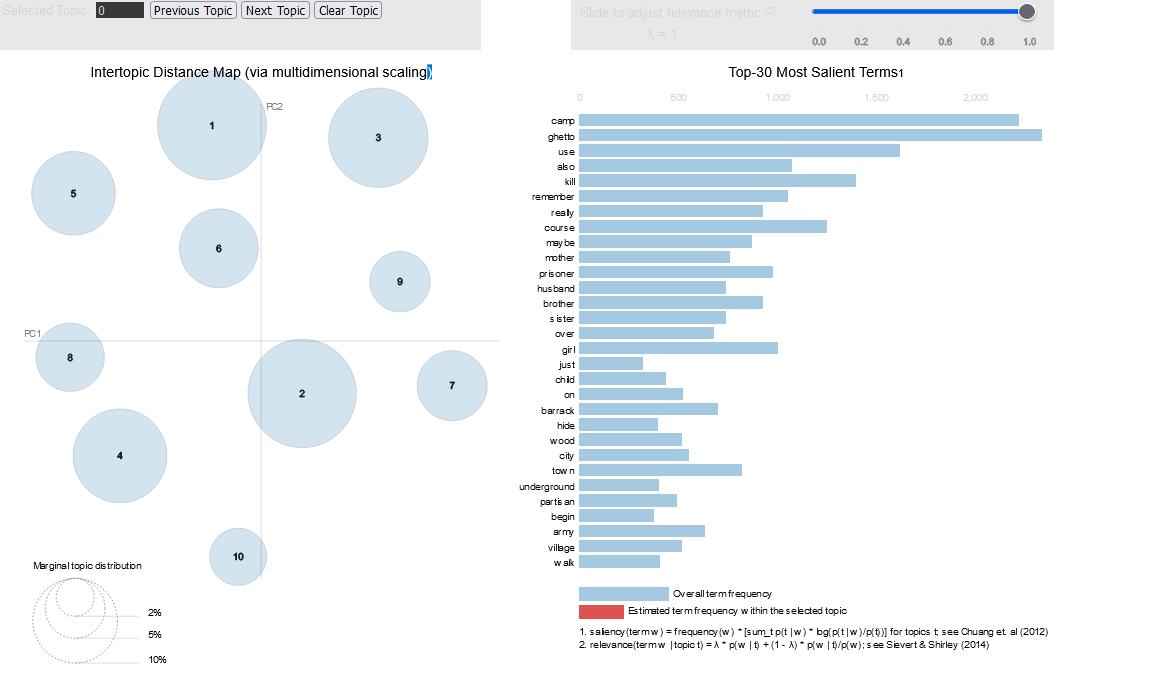

Notice how we get better separation between topics. There is less overlap between each topic, and each topic seems to deal with words in a more specific context.
- topic 2 seems to deal with words in a militaristic context
- topic 1 seems to deal with familial words

Hyperparameter tuning is necessary to create more interpretable topics which is often evaluated using human cognition